In [59]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [60]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

from data_ingestion import ingest_data
import itertools
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [61]:
fault_data_path = '../data/raw/fault_data.csv'
scada_data_path = '../data/raw/scada_data.csv'
status_data_path = '../data/raw/status_data.csv'

# Load the CSV files
df_fault = ingest_data(fault_data_path)
df_scada = ingest_data(scada_data_path)
df_status = ingest_data(status_data_path)

In [62]:
# Convert data columns to datetime format
df_status['Time'] = pd.to_datetime(df_status['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_scada['DateTime'] = pd.to_datetime(df_scada['DateTime'], format='%m/%d/%Y %H:%M', errors='coerce')
df_fault['DateTime'] = pd.to_datetime(df_fault['DateTime'], errors='coerce')

In [63]:
df_scada

,DateTime,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
0,2014-05-01 00:00:00,1398920448,0,6.9,9.4,2.9,0.00,0.02,0.00,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
1,2014-05-01 00:09:00,1398920960,0,5.3,8.9,1.6,0.00,0.01,0.00,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2,2014-05-01 00:20:00,1398921600,0,5.0,9.5,1.4,0.00,0.04,0.00,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
3,2014-05-01 00:30:00,1398922240,0,4.4,8.3,1.3,0.00,0.08,0.00,0,...,23,21,25,12,14,24,34,2501,25.272728,1.103713
4,2014-05-01 00:39:00,1398922752,0,5.7,9.7,1.2,0.00,0.05,0.00,0,...,23,21,25,12,14,23,34,2501,25.272728,1.103713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49022,2015-04-08 23:20:00,1428553216,0,3.9,5.5,2.2,6.75,7.40,6.01,147,...,33,23,28,9,17,27,35,3050,24.454546,3.474583
49023,2015-04-08 23:30:00,1428553856,0,3.9,5.6,2.9,6.64,7.06,6.33,128,...,34,23,28,9,17,27,35,3050,24.454546,3.445683
49024,2015-04-08 23:39:00,1428554368,0,4.2,6.7,2.6,7.18,8.83,6.22,163,...,34,23,28,9,18,27,34,3050,24.363636,3.413876
49025,2015-04-08 23:50:00,1428555008,0,4.1,6.6,2.7,7.02,7.94,6.20,160,...,33,23,28,9,17,27,34,3050,24.000000,3.376389


In [64]:
def power_law(x, a, b):
    return a * x**b

In [65]:
x = df_scada["WEC: ava. windspeed"]
y = df_scada["WEC: ava. Power"]

In [66]:
# Perform curve fitting using scipy's curve_fit
params, covariance = curve_fit(power_law, x, y)

In [67]:
# Extract the fitted parameters a and b
a_fit, b_fit = params
print(f"Fitted parameters: a = {a_fit:.2f}, b = {b_fit:.2f}")


Fitted parameters: a = 54.66, b = 1.46


In [68]:
# Generate fitted values based on the fitted parameters
y_fit = power_law(x, a_fit, b_fit)

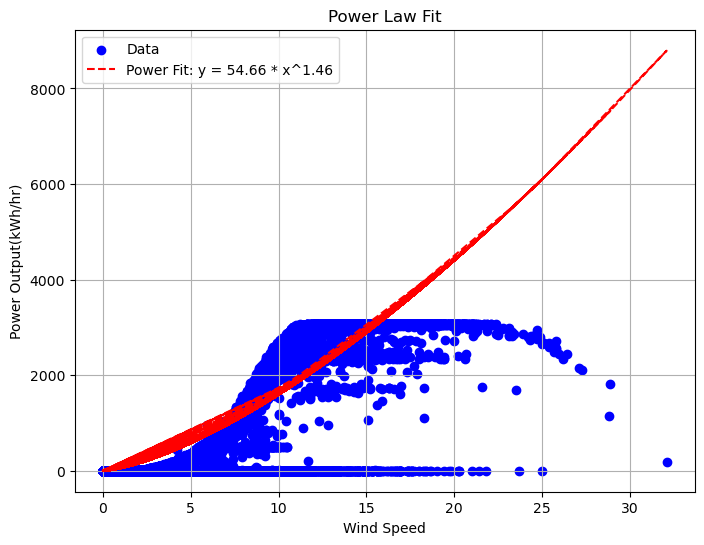

In [69]:
# Plot the data and the fitted power law curve
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_fit, label=f'Power Fit: y = {a_fit:.2f} * x^{b_fit:.2f}', color='red', linestyle='--')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output(kWh/hr)')  # Replace with actual label for y-axis
plt.title('Power Law Fit')
plt.legend()
plt.grid(True)
plt.show()